# Cross-entropy loss, Softmax e True labels (one-hot encoded)

Slide sobre a função Softmax: [Softmax](https://docs.google.com/presentation/d/1vYC14agPvr9Rr_KX0uV2dGpje-mM97-qkod8XoPAdtU/edit?usp=sharing)

In [ ]:
import numpy as np
true_labels = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]])

def generate_logits(true_labels):
    np.random.seed()
    logits = np.random.uniform(0.1, 3.0, true_labels.shape)

    # 1 amostra para cada classe
    for i in range(true_labels.shape[0]):
        max_value = np.random.uniform(0.1, 3.0)
        max_indices = np.where(true_labels[i] == 1)[0]

        for idx in max_indices:
            logits[i, idx] = max_value

        non_max_indices = np.where(true_labels[i] == 0)[0]
        logits[i, non_max_indices] = np.random.uniform(0.1, max_value, len(non_max_indices))

    return logits

logits = generate_logits(true_labels)
print("Logits:\n", logits)

Logits:
 [[1.24241636 1.24142641 0.46591879]
 [0.1610065  0.17028466 0.14580564]
 [0.37611815 1.13946606 2.12597071]]


In [ ]:
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def cross_entropy_loss(predictions, labels):
    # evitar log(0)
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)

    # perda
    loss = -np.sum(labels * np.log(predictions)) / labels.shape[0]
    return loss

In [ ]:
CE_loss = cross_entropy_loss(softmax(logits), true_labels)
CE_loss

0.8077615359357305

In [ ]:
import matplotlib.pyplot as plt

def generate_gaussian_sequences(logits, true_labels, stddev, num_sequences=4):
    sequences = []
    losses = []

    for _ in range(num_sequences):
        noisy_logits = logits + np.random.normal(0, stddev, logits.shape)
        sequences.append(noisy_logits)

        predictions = softmax(noisy_logits)

        # perda (cross-entropy loss) para a sequência gerada
        loss = cross_entropy_loss(predictions, true_labels)
        losses.append(loss)

    return sequences, losses

In [ ]:
logits = generate_logits(true_labels)
std = .1

entropy_history = []

for k in range(30):
    all_sequences = [logits]

    # + 4 sequencias
    new_sequences, _ = generate_gaussian_sequences(logits, true_labels, std)
    all_sequences.extend(new_sequences)

    # probabilidades e perdas (cross-entropy)
    losses = []
    for sequence in all_sequences:
        sequence = np.array(sequence)
        if sequence.ndim == 1:
            sequence = sequence.reshape(1, -1)
        probabilities = softmax(sequence)
        loss = cross_entropy_loss(probabilities, true_labels)
        losses.append(loss)

    losses = np.array(losses)
    sorted_indices = np.argsort(losses)

    # 5 melhores seqs
    all_sequences = [all_sequences[i] for i in sorted_indices[:5]]

    # Atualizar logits com a média das 5 melhores sequências
    logits = np.mean(all_sequences, axis=0)

    # entropia média
    mean_entropy = np.mean(losses[sorted_indices[:5]])
    entropy_history.append(mean_entropy)

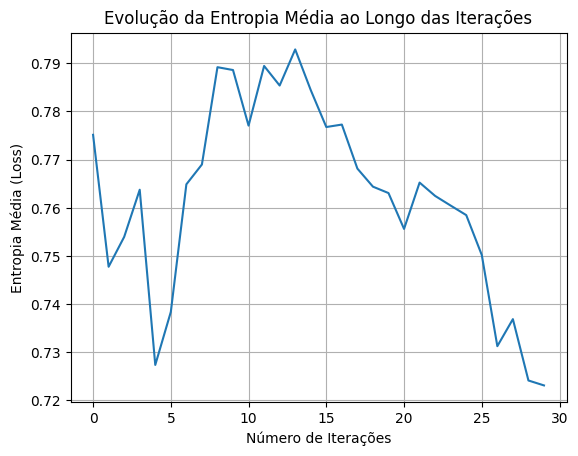

Última entropia média após 30 iterações: 0.7231285627101224


In [ ]:
plt.plot(entropy_history)
plt.xlabel('Número de Iterações')
plt.ylabel('Entropia Média (Loss)')
plt.title('Evolução da Entropia Média ao Longo das Iterações')
plt.grid(True)
plt.show()

print("Última entropia média após 30 iterações:", entropy_history[-1])